<a href="https://colab.research.google.com/github/Knell999/ML_Ops_HK-Toss/blob/main/Chapter_1_%EA%B8%B0%EC%B4%88/02_%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EB%8F%84%EA%B5%AC/04_%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EA%B8%B0%EB%B0%98%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/01_CCTV%2C_%EC%9D%B8%EA%B5%AC%EC%88%98_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

cctv_file = "./data/01. CCTV_in_Seoul.csv"
pop_file  = "./data/01. population_in_Seoul.xls"

df_cctv = pd.read_csv(cctv_file)
df_pop = pd.read_excel(pop_file)

In [ ]:
df_cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [ ]:
df_cctv = df_cctv.rename(
    columns = {
        "기관명" : "구별"
    }
)
df_cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   구별         25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [ ]:
df_pop_seoul = pd.read_excel(pop_file)
df_pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [ ]:
# 필요한 부분만 지정하여 가져오기
df_pop_seoul = pd.read_excel(
    pop_file,
    header=2,
    usecols='B,D,G,J,N'
)

df_pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [ ]:
df_pop_seoul.columns = ["구별", "인구수", "한국인","외국인", "고령자"]
df_pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [ ]:
df_pop_seoul = df_pop_seoul.drop([0])
df_pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [ ]:
print(df_cctv['구별'].unique())

['강남구' '강동구' '강북구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구' '도봉구' '동대문구' '동작구'
 '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '종로구' '중구'
 '중랑구']


In [ ]:
print(df_pop_seoul['구별'].unique())

['종로구' '중구' '용산구' '성동구' '광진구' '동대문구' '중랑구' '성북구' '강북구' '도봉구' '노원구' '은평구'
 '서대문구' '마포구' '양천구' '강서구' '구로구' '금천구' '영등포구' '동작구' '관악구' '서초구' '강남구' '송파구'
 '강동구' nan]


In [ ]:
df_pop_seoul = df_pop_seoul.dropna()
df_pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 1 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      25 non-null     object 
 1   인구수     25 non-null     float64
 2   한국인     25 non-null     float64
 3   외국인     25 non-null     float64
 4   고령자     25 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [ ]:
df_cctv.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [ ]:
df_cctv.sort_values(by='소계', ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [ ]:
df_cctv["최근증가율"] = (df_cctv["2014년"]+df_cctv["2015년"]+df_cctv["2016년"])/df_cctv["2013년도 이전"]*100

In [ ]:
df_cctv.sort_values(by="최근증가율", ascending=False)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765
19,영등포구,904,495,214,195,373,157.979798
0,강남구,2780,1292,430,584,932,150.619195
4,관악구,1496,846,260,390,613,149.290780
23,중구,671,413,190,72,348,147.699758
11,동작구,1091,544,341,103,314,139.338235


In [ ]:
# 인구 데이터 살펴보기

# 구별 cctv의 설치 대수가 적절한지 볼 예정
# 적절하다의 기준을 인구수로 일단 생각할 것
df_pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [ ]:
df_pop_seoul["외국인비율"] = df_pop_seoul["외국인"] / df_pop_seoul["인구수"]
df_pop_seoul["고령자비율"] = df_pop_seoul["고령자"] / df_pop_seoul["인구수"]

df_pop_seoul.sort_values(by='외국인', ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,0.086636,0.130062
17,구로구,447874.0,416487.0,31387.0,56833.0,0.070080,0.126895
18,금천구,255082.0,236353.0,18729.0,32970.0,0.073423,0.129253
21,관악구,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553
6,동대문구,369496.0,354079.0,15417.0,54173.0,0.041724,0.146613
5,광진구,372164.0,357211.0,14953.0,42214.0,0.040179,0.113428
3,용산구,244203.0,229456.0,14747.0,36231.0,0.060388,0.148364
13,서대문구,327163.0,314982.0,12181.0,48161.0,0.037232,0.147208
20,동작구,412520.0,400456.0,12064.0,56013.0,0.029245,0.135783
8,성북구,461260.0,449773.0,11487.0,64692.0,0.024904,0.140251


In [ ]:
df_pop_seoul.sort_values(by='외국인비율', ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,0.086636,0.130062
18,금천구,255082.0,236353.0,18729.0,32970.0,0.073423,0.129253
17,구로구,447874.0,416487.0,31387.0,56833.0,0.070080,0.126895
2,중구,133240.0,124312.0,8928.0,20764.0,0.067007,0.155839
3,용산구,244203.0,229456.0,14747.0,36231.0,0.060388,0.148364
1,종로구,162820.0,153589.0,9231.0,25425.0,0.056695,0.156154
6,동대문구,369496.0,354079.0,15417.0,54173.0,0.041724,0.146613
5,광진구,372164.0,357211.0,14953.0,42214.0,0.040179,0.113428
13,서대문구,327163.0,314982.0,12181.0,48161.0,0.037232,0.147208
21,관악구,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553


In [ ]:
df_pop_seoul.sort_values(by='고령자비율', ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,0.010618,0.166003
1,종로구,162820.0,153589.0,9231.0,25425.0,0.056695,0.156154
2,중구,133240.0,124312.0,8928.0,20764.0,0.067007,0.155839
3,용산구,244203.0,229456.0,14747.0,36231.0,0.060388,0.148364
13,서대문구,327163.0,314982.0,12181.0,48161.0,0.037232,0.147208
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.005785,0.147175
6,동대문구,369496.0,354079.0,15417.0,54173.0,0.041724,0.146613
12,은평구,494388.0,489943.0,4445.0,72334.0,0.008991,0.146310
8,성북구,461260.0,449773.0,11487.0,64692.0,0.024904,0.140251
7,중랑구,414503.0,409882.0,4621.0,56774.0,0.011148,0.136969


# CCTV, 인구수 데이터 합쳐서 분석하기

In [ ]:
data_result = pd.merge(df_cctv, df_pop_seoul, on='구별')
data_result

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.009298,0.120516
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,0.010618,0.166003
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,0.010805,0.120158
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553
5,광진구,707,573,78,53,174,53.228621,372164.0,357211.0,14953.0,42214.0,0.040179,0.113428
6,구로구,1561,1142,173,246,323,64.973730,447874.0,416487.0,31387.0,56833.0,0.070080,0.126895
7,금천구,1015,674,51,269,354,100.000000,255082.0,236353.0,18729.0,32970.0,0.073423,0.129253
8,노원구,1265,542,57,451,516,188.929889,569384.0,565565.0,3819.0,71941.0,0.006707,0.126349
9,도봉구,485,238,159,42,386,246.638655,348646.0,346629.0,2017.0,51312.0,0.005785,0.147175


## 필요 없는 컬럼 삭제
각 년도별로 얼마나 설치가 되었느냐는 중요하지 않다.
* 우리가 필요한 정보는 구별 CCTV의 **소계**가 중요하기 때문에,
* 2013, 2014, 2015, 2016 년도의 CCTV 대수를 통해 **최근증가율**을 구해냈기 때문에

In [ ]:
data_result = data_result.drop(['2013년도 이전', '2014년', '2015년', '2016년'], axis=1)
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.009298,0.120516
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,0.010618,0.166003
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,0.010805,0.120158
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553


## CCTV 소계의 상관관계 이야기 하기
* 어떠한 요건에 의해서(x) CCTV의 소계(y)가 결정이 되었는지를 확인
* 어떠한 데이터를 CCTV의 소계와 비교할지를 결정해 볼 것
  * 이러한 수치를 **상관관계**라고 합니다.
* 상관계수
  * 상관계수의 절대값이 0.1이하면 무시해도 되는 상관관계
  * 상관계수의 절대값이 0.1 ~ 0.3 정도면 약한 상관관계
  * 상관계수의 절대값이 0.3 ~ 0.7 정도면 뚜렷한 상관관계
  * 상관계수의 절대값이 0.7 ~ 1.0 정도면 강한 상관관계

In [ ]:
import numpy as np

np.corrcoef(data_result["고령자비율"], data_result["소계"])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [ ]:
np.corrcoef(data_result["외국인비율"], data_result["소계"])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [ ]:
np.corrcoef(data_result["인구수"], data_result["소계"])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
data_result = data_result.set_index("구별")
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.009298,0.120516
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,0.010618,0.166003
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,0.010805,0.120158
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553


In [ ]:
data_result.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='구별')

<BarContainer object of 25 artists>

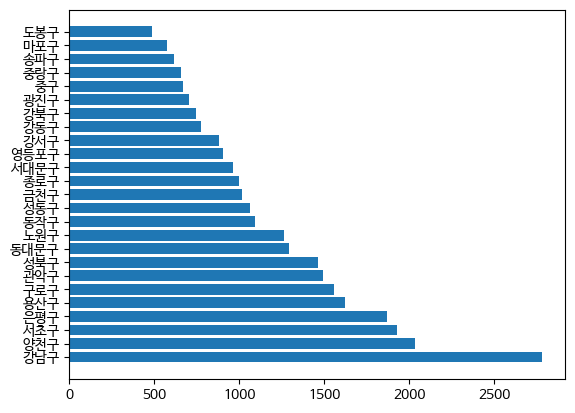

In [ ]:
# CCTV 소계로 정렬해서 barh로 정렬
data_sorted = data_result.sort_values(by="소계", ascending=False)
plt.barh(data_sorted.index, data_sorted["소계"])

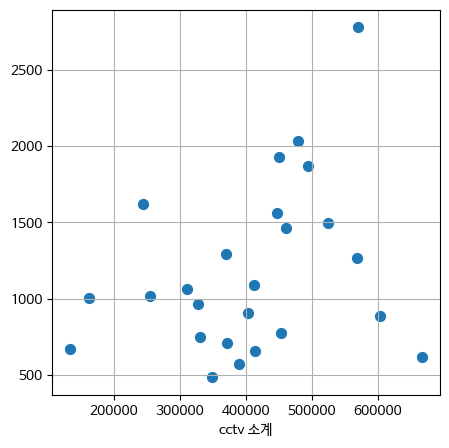

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(data_result["인구수"], data_result["소계"], s=50)
plt.xlabel("인구수")
plt.xlabel("cctv 소계")
plt.grid()
plt.show()

### [참고] cctv와 인구 관계를 직선으로 표현하기

- 공부 ㄴㄴ

`np.polyfit(x, y, 1)`은 따로 공부하거나 걱정하지 마세요!

* `x` : x축에 들어갈 데이터 $y=f(x)$에서 x를 의미
* `y` : x의 기울기와 절편을 구할 기준 데이터(x의 결과물)
* `1` : 1차식으로 만들겠다.

In [ ]:
fp1 = np.polyfit(
    data_result['인구수'], # x축 데이터
    data_result['소계'], # y축 데이터
    1
)

fp1

array([1.30916415e-03, 6.45066497e+02])

In [ ]:
# 구해진 기울기와 절편을 이용해 1차 함수를 만든다.
f1 = np.poly1d(fp1)

f1

poly1d([1.30916415e-03, 6.45066497e+02])

In [ ]:
f1(100000)

775.9829117091168

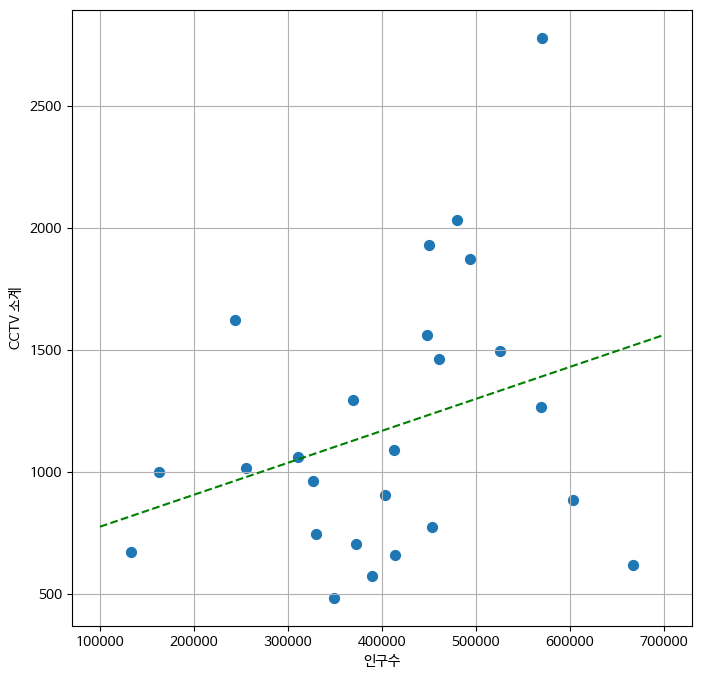

In [ ]:
fx = np.linspace(100000, 700000, 100)
plt.figure(figsize=[8,8])
plt.scatter(data_result['인구수'], data_result['소계'], s=50)

y = f1(fx) # y = f(x)
plt.plot(fx, y, color='g', linestyle='--')
plt.xlabel("인구수")
plt.ylabel('CCTV 소계')

plt.grid()
plt.show()

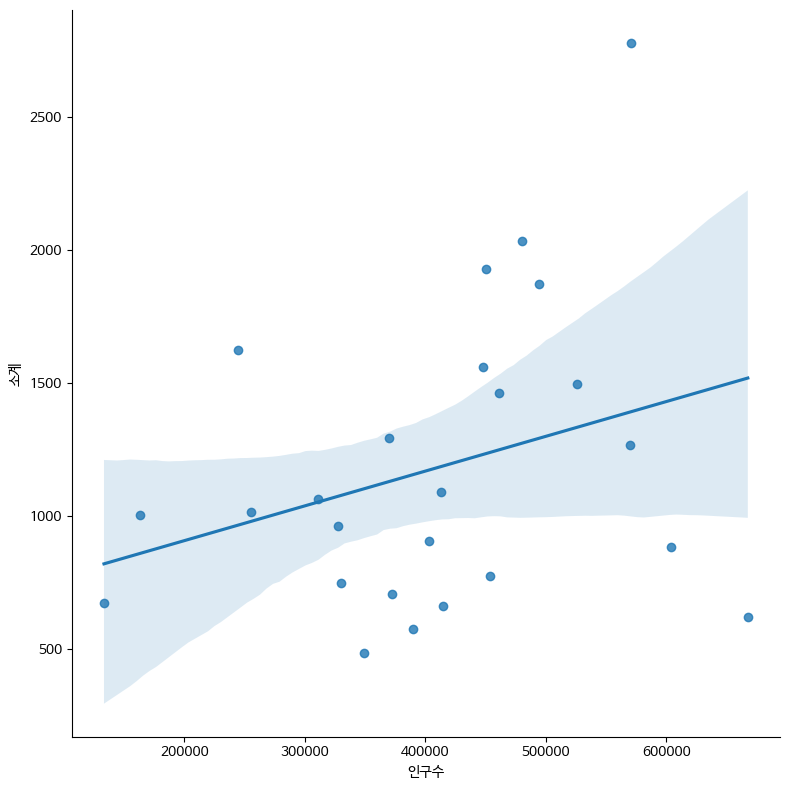

In [ ]:
import seaborn as sns

sns.lmplot(x='인구수', y='소계', height= 8, data=data_result)
plt.show()

# 인구수 대비해 CCTV가 적절하게 설치 되어 있지 않은 지역 확인
- 인구수 대비 CCTV 과다설치 지역
- 인구수 대비 CCTV 설치저조 지역

In [ ]:
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

In [ ]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.009298,0.120516,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,0.010618,0.166003,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,0.010805,0.120158,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553,162.948104


In [ ]:
df_error_sort = data_result.sort_values(by="오차", ascending=False)
df_error_sort

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,0.010336,0.108626,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.008394,0.110370,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.009585,0.114883,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,0.060388,0.148364,659.231690
도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.005785,0.147175,616.501341
마포구,574,212.101911,389649.0,378566.0,11083.0,48765.0,0.028444,0.125151,581.180999
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.008991,0.146310,580.698457
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,0.010805,0.120158,551.503155


<ipython-input-56-4f6ad380a2ae>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_error_sort['인구수'][n]*1.02, df_error_sort['소계'][n]*0.98, df_error_sort.index[n], fontsize=15)


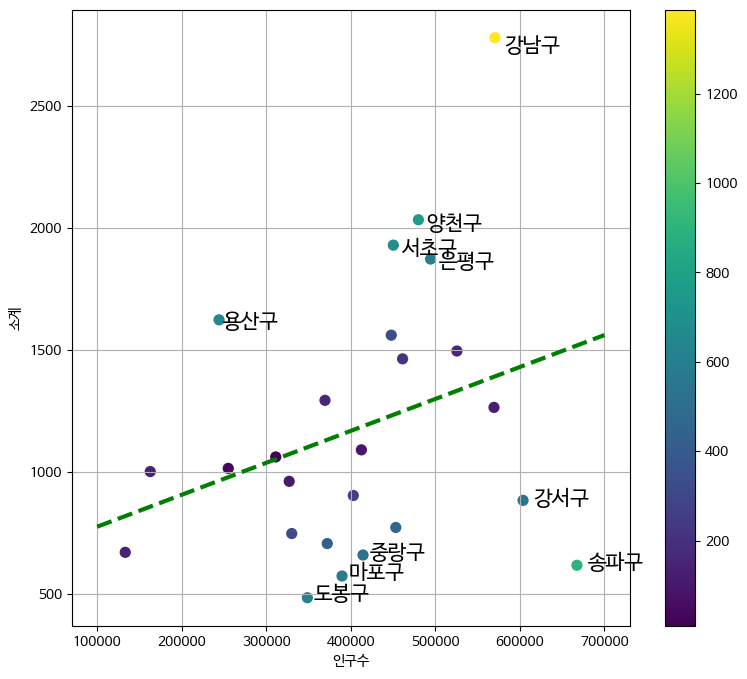

In [ ]:
# 텍스트와 컬러맵 입히기
plt.figure(figsize=(9, 8))
plt.scatter(df_error_sort['인구수'], df_error_sort['소계'], c=df_error_sort['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

# 오차가 가장 큰 10개의 구에 대해서 텍스트를 부여
for n in range(10):
  # scatter가 찍힌 좌표를 기준으로 약간 오른쪽( 인구수보다 약간 큼 ) 아래 ( 소계 보다 약간 작음 )
  plt.text(df_error_sort['인구수'][n]*1.02, df_error_sort['소계'][n]*0.98, df_error_sort.index[n], fontsize=15)

plt.xlabel("인구수")
plt.ylabel("소계")

plt.colorbar()
plt.grid()
plt.show()